In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from fsmodels import MultiExpFrequencyScan

# Проверка прототипа модели на частотном скане из 3 экспоненциальных составляющих

In [2]:
fs = MultiExpFrequencyScan(n_exps=3,
                           exps_params=[[-1.0, 3.5],
                                        [-2.3, 3.0],
                                        [-3.5, 2.5]]
                          )

In [3]:
frequency_powers = np.linspace(0, 3.5, 200)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()
experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

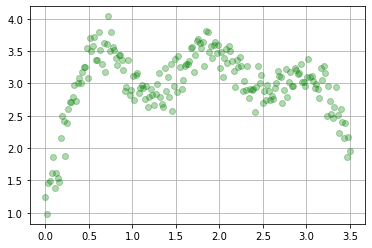

In [4]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
n_exps = 3
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

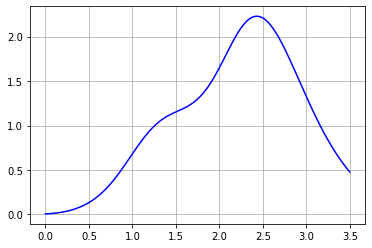

In [6]:
plt.plot(frequency_powers, initial_model, '-b')

plt.grid()
plt.show()

In [7]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-2.87395366  1.        ]
 [-2.82321268  1.        ]
 [-1.75327229  1.        ]]
Loss: 4.282894825084221
iter # 1
exps_params:
 [[-2.84611899  1.09128664]
 [-2.79059658  1.09281937]
 [-1.69377274  1.14931118]]
Loss: 3.8491761589128966
iter # 2
exps_params:
 [[-2.82232872  1.17350214]
 [-2.76036054  1.17640747]
 [-1.62130432  1.28936386]]
Loss: 3.4565314339677644
iter # 3
exps_params:
 [[-2.80211552  1.24825803]
 [-2.73172159  1.25245112]
 [-1.53884258  1.42223782]]
Loss: 3.0923757858922762
iter # 4
exps_params:
 [[-2.78468897  1.3169358 ]
 [-2.70340193  1.32241688]
 [-1.45145821  1.54950926]]
Loss: 2.753987467148346
iter # 5
exps_params:
 [[-2.7694342   1.38056078]
 [-2.67406021  1.38741717]
 [-1.36633671  1.67193232]]
Loss: 2.447420596820259
iter # 6
exps_params:
 [[-2.7564223   1.43974891]
 [-2.64275664  1.44813722]
 [-1.29128217  1.78934957]]
Loss: 2.180787605262614
iter # 7
exps_params:
 [[-2.74667122  1.49477095]
 [-2.60920424  1.50487487]
 [-1.23165622  1.

iter # 63
exps_params:
 [[-3.43918518  2.55025614]
 [-2.27477727  2.79642083]
 [-1.00062417  3.45527133]]
Loss: 0.04283662243435014
iter # 64
exps_params:
 [[-3.44101867  2.55155975]
 [-2.2754832   2.80255493]
 [-1.00037182  3.45850605]]
Loss: 0.04231069986702603
iter # 65
exps_params:
 [[-3.44277937  2.55272233]
 [-2.27616513  2.80847432]
 [-1.0001307   3.46155794]]
Loss: 0.04182759801799968
iter # 66
exps_params:
 [[-3.44447049  2.553753  ]
 [-2.27682396  2.81418811]
 [-0.99990016  3.46443712]]
Loss: 0.04138338073646537
iter # 67
exps_params:
 [[-3.4460951   2.55466031]
 [-2.27746054  2.81970494]
 [-0.99967962  3.46715316]]
Loss: 0.04097450225329442
iter # 68
exps_params:
 [[-3.4476561   2.5554523 ]
 [-2.27807571  2.82503301]
 [-0.99946854  3.46971505]]
Loss: 0.04059776646414193
iter # 69
exps_params:
 [[-3.44915628  2.55613654]
 [-2.27867026  2.83018013]
 [-0.9992664   3.47213132]]
Loss: 0.04025029063251107
iter # 70
exps_params:
 [[-3.45059827  2.55672014]
 [-2.27924497  2.83515373

iter # 125
exps_params:
 [[-3.48414343  2.53587655]
 [-2.29413165  2.96450133]
 [-0.99461986  3.50901042]]
Loss: 0.035471953131126284
iter # 126
exps_params:
 [[-3.48435716  2.5353612 ]
 [-2.29424521  2.96548093]
 [-0.99459145  3.50905214]]
Loss: 0.03545923405750365
iter # 127
exps_params:
 [[-3.48456481  2.53485174]
 [-2.29435604  2.96643603]
 [-0.99456388  3.50908932]]
Loss: 0.0354470784567936
iter # 128
exps_params:
 [[-3.48476659  2.53434829]
 [-2.29446423  2.96736731]
 [-0.99453711  3.50912224]]
Loss: 0.0354354596131591
iter # 129
exps_params:
 [[-3.4849627   2.53385092]
 [-2.29456985  2.96827545]
 [-0.99451113  3.50915121]]
Loss: 0.035424352236556766
iter # 130
exps_params:
 [[-3.48515333  2.53335972]
 [-2.29467297  2.96916109]
 [-0.99448591  3.50917648]]
Loss: 0.03541373237300258
iter # 131
exps_params:
 [[-3.48533865  2.53287476]
 [-2.29477367  2.97002486]
 [-0.99446143  3.50919831]]
Loss: 0.035403577321557474
iter # 132
exps_params:
 [[-3.48551884  2.53239608]
 [-2.29487201  2

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,4.282895,3,-2.873954,1.000000,-2.823213,1.000000,-1.753272,1.000000
1,3.849176,3,-2.846119,1.091287,-2.790597,1.092819,-1.693773,1.149311
2,3.456531,3,-2.822329,1.173502,-2.760361,1.176407,-1.621304,1.289364
3,3.092376,3,-2.802116,1.248258,-2.731722,1.252451,-1.538843,1.422238
4,2.753987,3,-2.784689,1.316936,-2.703402,1.322417,-1.451458,1.549509
...,...,...,...,...,...,...,...,...
128,0.035435,3,-3.484767,2.534348,-2.294464,2.967367,-0.994537,3.509122
129,0.035424,3,-3.484963,2.533851,-2.294570,2.968275,-0.994511,3.509151
130,0.035414,3,-3.485153,2.533360,-2.294673,2.969161,-0.994486,3.509176
131,0.035404,3,-3.485339,2.532875,-2.294774,2.970025,-0.994461,3.509198


In [8]:
for scan in fs._fs_list:
    print(scan)

In [9]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.5319237365132747
Time constant power 0 : -3.4856940732621076
Amplitude 1 : 2.971689180737571
Time constant power 1 : -2.294968065733032
Amplitude 2 : 3.5092325842907965
Time constant power 2 : -0.9944145741051121


In [10]:
fs.exps_params

array([[-3.48569407,  2.53192374],
       [-2.29496807,  2.97168918],
       [-0.99441457,  3.50923258]])

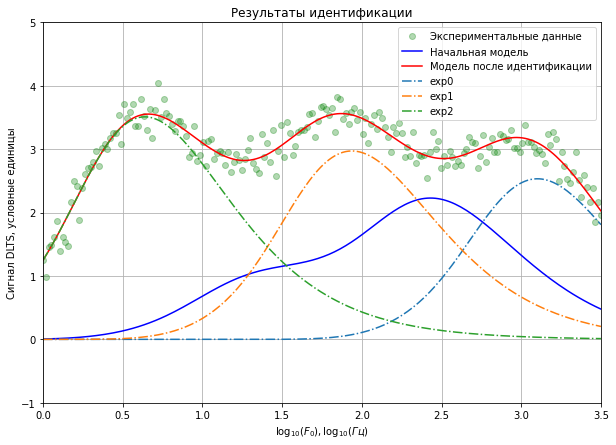

In [11]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    n_exps=fit_results.loc[0, 'n_exps']
    
    init_params = fit_results.iloc[0, :]
    init_params = [[init_params[f'time_constatn_power_{i}'], init_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs = MultiExpFrequencyScan(n_exps=n_exps, exps_params=init_params)
    initial_model = fs(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_params = [[final_params[f'time_constatn_power_{i}'], final_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs.exps_params=final_params
    final_model = fs(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    for i, scan in enumerate(fs._fs_list):
        plt.plot(frequency_powers, scan(frequency_powers), '-.', label=f'exp{i}')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax


final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

# Проверка прототипа модели на частотном скане из 5 экспоненциальных составляющих

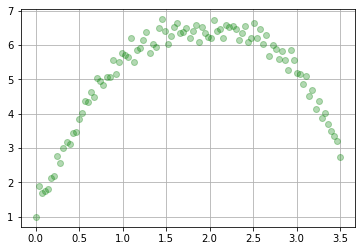

In [12]:
fs = MultiExpFrequencyScan(n_exps=5,
                           exps_params=[[-1.0, 3.50],
                                        [-1.7, 3.25],
                                        [-2.3, 3.00],
                                        [-2.9, 2.75],
                                        [-3.5, 2.50]]
                          )

frequency_powers = np.linspace(0, 3.5, 100)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [13]:
n_exps = 5
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

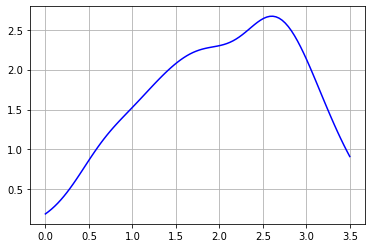

In [14]:
plt.plot(frequency_powers, initial_model, '-b')

plt.grid()
plt.show()

In [15]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-3.17546711  1.        ]
 [-1.1694836   1.        ]
 [-3.08999447  1.        ]
 [-1.87896798  1.        ]
 [-2.33555788  1.        ]]
Loss: 12.411769205009332
iter # 1
exps_params:
 [[-3.04098354  1.20331305]
 [-1.28691765  1.26616262]
 [-2.96288584  1.21449165]
 [-1.86930706  1.30051737]
 [-2.27751092  1.28444361]]
Loss: 8.919745004572066
iter # 2
exps_params:
 [[-2.95269905  1.38878909]
 [-1.34865722  1.505528  ]
 [-2.88055351  1.40547228]
 [-1.835256    1.54258538]
 [-2.22215023  1.51184233]]
Loss: 6.5659166961639315
iter # 3
exps_params:
 [[-2.91576332  1.55129313]
 [-1.35055592  1.70919501]
 [-2.84816116  1.56975766]
 [-1.78011064  1.73481329]
 [-2.17744165  1.6909894 ]]
Loss: 4.99796567107364
iter # 4
exps_params:
 [[-2.91386073  1.69335639]
 [-1.31922135  1.87952941]
 [-2.84984399  1.71181756]
 [-1.71775183  1.89120287]
 [-2.14608501  1.83620749]]
Loss: 3.8745662211656056
iter # 5
exps_params:
 [[-2.92639355  1.81944608]
 [-1.28139853  2.02292929]
 [-2.8

iter # 45
exps_params:
 [[-3.44126918  2.83359762]
 [-0.9820236   3.13810505]
 [-2.82271195  2.83193839]
 [-1.59493172  3.07063675]
 [-2.21395619  3.04754939]]
Loss: 0.04239933419450663
iter # 46
exps_params:
 [[-3.4430659   2.83642163]
 [-0.9814592   3.14085128]
 [-2.82288589  2.83486762]
 [-1.5950125   3.07314705]
 [-2.21436753  3.05018331]]
Loss: 0.042004558688136476
iter # 47
exps_params:
 [[-3.44472525  2.83900363]
 [-0.980939    3.14338139]
 [-2.82305511  2.83759198]
 [-1.59509038  3.07545902]
 [-2.21474355  3.05260379]]
Loss: 0.041669249224557975
iter # 48
exps_params:
 [[-3.44625906  2.84136286]
 [-0.98045992  3.14571298]
 [-2.82321879  2.84012825]
 [-1.59516496  3.07758885]
 [-2.21508815  3.05482829]]
Loss: 0.0413842660587914
iter # 49
exps_params:
 [[-3.44767789  2.843517  ]
 [-0.98001898  3.14786217]
 [-2.82337641  2.84249172]
 [-1.59523605  3.07955136]
 [-2.2154046   3.05687277]]
Loss: 0.04114190205683492
iter # 50
exps_params:
 [[-3.44899124  2.84548227]
 [-0.97961329  3.1

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,time_constatn_power_4,amplitude_4
0,12.411769,5,-3.175467,1.000000,-1.169484,1.000000,-3.089994,1.000000,-1.878968,1.000000,-2.335558,1.000000
1,8.919745,5,-3.040984,1.203313,-1.286918,1.266163,-2.962886,1.214492,-1.869307,1.300517,-2.277511,1.284444
2,6.565917,5,-2.952699,1.388789,-1.348657,1.505528,-2.880554,1.405472,-1.835256,1.542585,-2.222150,1.511842
3,4.997966,5,-2.915763,1.551293,-1.350556,1.709195,-2.848161,1.569758,-1.780111,1.734813,-2.177442,1.690989
4,3.874566,5,-2.913861,1.693356,-1.319221,1.879529,-2.849844,1.711818,-1.717752,1.891203,-2.146085,1.836207
...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.039809,5,-3.461180,2.860730,-0.976077,3.167553,-2.825279,2.867036,-1.596020,3.097467,-2.218272,3.074935
68,0.039796,5,-3.461535,2.860982,-0.975986,3.168032,-2.825347,2.867816,-1.596044,3.097899,-2.218339,3.075332
69,0.039784,5,-3.461866,2.861194,-0.975901,3.168477,-2.825413,2.868563,-1.596068,3.098299,-2.218400,3.075694
70,0.039774,5,-3.462175,2.861368,-0.975823,3.168888,-2.825477,2.869279,-1.596090,3.098670,-2.218457,3.076025


In [16]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.8616159475932044
Time constant power 0 : -3.46273609323485
Amplitude 1 : 3.1696243327031364
Time constant power 1 : -0.975685251713417
Amplitude 2 : 2.870627197359701
Time constant power 2 : -2.8255976358890593
Amplitude 3 : 3.099329824500852
Time constant power 3 : -1.5961321852628363
Amplitude 4 : 3.0765991820191605
Time constant power 4 : -2.2185551240444106


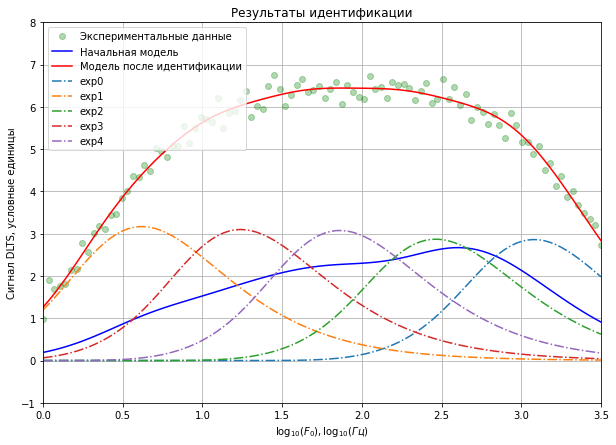

In [17]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - недостаточное количество экспоененциальных составляющих

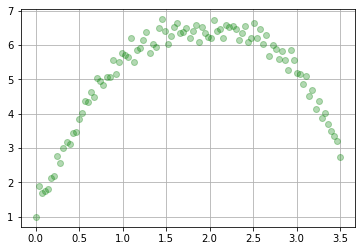

In [18]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

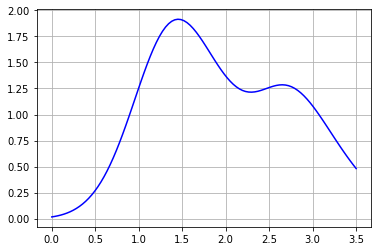

In [19]:
n_exps = 3
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           learning_rate=0.075,
                           n_iters=400,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers, initial_model, '-b')

plt.grid()
plt.show()

In [20]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-1.63607713  1.        ]
 [-3.17771431  1.        ]
 [-1.93412853  1.        ]]
Loss: 17.720541562919003
iter # 1
exps_params:
 [[-1.66967691  1.24990254]
 [-3.0463901   1.20245109]
 [-1.95255867  1.25750891]]
Loss: 15.297455153469377
iter # 2
exps_params:
 [[-1.69104122  1.4789751 ]
 [-2.93512777  1.40610749]
 [-1.96656284  1.4904231 ]]
Loss: 13.248764963516757
iter # 3
exps_params:
 [[-1.69392337  1.68711934]
 [-2.85700372  1.60357644]
 [-1.97261897  1.69920987]]
Loss: 11.577221285488253
iter # 4
exps_params:
 [[-1.67753671  1.87541074]
 [-2.81404952  1.79030474]
 [-1.97203384  1.88585431]]
Loss: 10.212938905533429
iter # 5
exps_params:
 [[-1.64532437  2.04618567]
 [-2.79987714  1.96537552]
 [-1.96925092  2.053548  ]]
Loss: 9.069768278254422
iter # 6
exps_params:
 [[-1.60240472  2.20229901]
 [-2.80481692  2.12989232]
 [-1.96931651  2.20580034]]
Loss: 8.083168961810802
iter # 7
exps_params:
 [[-1.55384189  2.34643232]
 [-2.81949224  2.28525812]
 [-1.97615642  

iter # 63
exps_params:
 [[-1.17133797  4.78095098]
 [-3.1654747   4.7626797 ]
 [-2.14557986  4.72682705]]
Loss: 0.1342851691179093
iter # 64
exps_params:
 [[-1.17080791  4.78794613]
 [-3.16667078  4.76839647]
 [-2.14597613  4.73545324]]
Loss: 0.13222845875628708
iter # 65
exps_params:
 [[-1.1703028   4.79459649]
 [-3.1678214   4.77375867]
 [-2.14636225  4.74375779]]
Loss: 0.13035673130027325
iter # 66
exps_params:
 [[-1.16982133  4.8009192 ]
 [-3.16892866  4.77878434]
 [-2.14673863  4.75175591]]
Loss: 0.12865245678373927
iter # 67
exps_params:
 [[-1.16936224  4.80693053]
 [-3.16999457  4.78349056]
 [-2.14710563  4.75946203]]
Loss: 0.1270997973098281
iter # 68
exps_params:
 [[-1.16892435  4.81264592]
 [-3.17102102  4.78789357]
 [-2.14746363  4.76688982]]
Loss: 0.12568444111442637
iter # 69
exps_params:
 [[-1.16850657  4.81808004]
 [-3.17200983  4.7920088 ]
 [-2.14781296  4.77405229]]
Loss: 0.12439345322598756
iter # 70
exps_params:
 [[-1.16810783  4.82324681]
 [-3.17296271  4.79585087]


iter # 125
exps_params:
 [[-1.15972075  4.91682954]
 [-3.19799501  4.81915978]
 [-2.15987419  4.96817631]]
Loss: 0.10877827865605565
iter # 126
exps_params:
 [[-1.15967233  4.9171343 ]
 [-3.19822098  4.81833229]
 [-2.16001846  4.96993886]]
Loss: 0.10872579617438731
iter # 127
exps_params:
 [[-1.15962527  4.9174242 ]
 [-3.19844349  4.81749633]
 [-2.1601614   4.97167532]]
Loss: 0.10867447531289781
iter # 128
exps_params:
 [[-1.15957953  4.9177    ]
 [-3.19866266  4.81665265]
 [-2.160303    4.97338646]]
Loss: 0.10862426661819813
iter # 129
exps_params:
 [[-1.15953503  4.91796243]
 [-3.19887858  4.81580197]
 [-2.16044335  4.975073  ]]
Loss: 0.10857512432443615
iter # 130
exps_params:
 [[-1.15949177  4.91821216]
 [-3.19909138  4.81494497]
 [-2.16058239  4.97673564]]
Loss: 0.1085270060262232
iter # 131
exps_params:
 [[-1.15944966  4.91844986]
 [-3.19930111  4.81408231]
 [-2.16072024  4.97837505]]
Loss: 0.10847987237521518
iter # 132
exps_params:
 [[-1.15940871  4.91867615]
 [-3.19950792  4.8

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,17.720542,3,-1.636077,1.000000,-3.177714,1.000000,-1.934129,1.000000
1,15.297455,3,-1.669677,1.249903,-3.046390,1.202451,-1.952559,1.257509
2,13.248765,3,-1.691041,1.478975,-2.935128,1.406107,-1.966563,1.490423
3,11.577221,3,-1.693923,1.687119,-2.857004,1.603576,-1.972619,1.699210
4,10.212939,3,-1.677537,1.875411,-2.814050,1.790305,-1.972034,1.885854
...,...,...,...,...,...,...,...,...
169,0.107199,3,-1.158198,4.922668,-3.205501,4.781037,-2.165605,5.027957
170,0.107178,3,-1.158710,4.922768,-3.206002,4.780174,-2.164818,5.029019
171,0.107159,3,-1.157999,4.922757,-3.205658,4.779420,-2.166087,5.030046
172,0.107143,3,-1.158895,4.922888,-3.206420,4.778533,-2.164656,5.031095


In [21]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 4.923019308727084
Time constant power 0 : -1.159241250469995
Amplitude 1 : 4.776894731622318
Time constant power 1 : -3.2069418964889147
Amplitude 2 : 5.033133804912775
Time constant power 2 : -2.1642240005531694


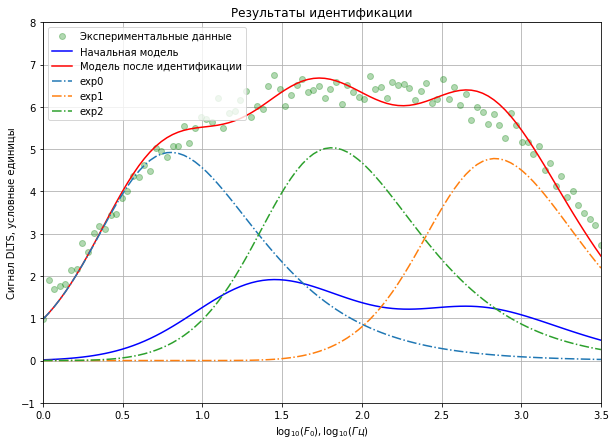

In [22]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - избыточное количество экспоененциальных составляющих (7 вместо 5)

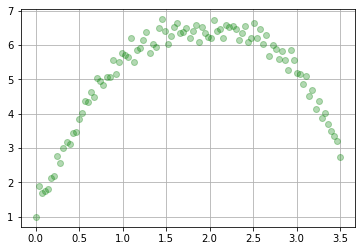

In [23]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

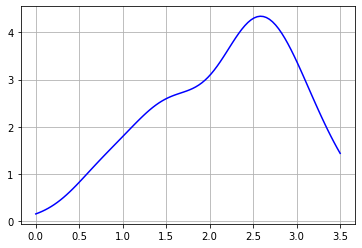

In [24]:
n_exps = 7
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers, initial_model, '-b')

plt.grid()
plt.show()

In [25]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-1.22689278  1.        ]
 [-3.01764665  1.        ]
 [-1.84086765  1.        ]
 [-2.07410736  1.        ]
 [-2.92028574  1.        ]
 [-2.89021683  1.        ]
 [-3.2893776   1.        ]]
Loss: 8.341217474301686
iter # 1
exps_params:
 [[-1.29512387  1.24980187]
 [-2.91801175  1.13981864]
 [-1.79241082  1.25265461]
 [-1.99621748  1.2378012 ]
 [-2.81548543  1.14977127]
 [-2.78392315  1.15294469]
 [-3.2004419   1.11444042]]
Loss: 5.535561310592411
iter # 2
exps_params:
 [[-1.30869987  1.45858271]
 [-2.85794537  1.25204409]
 [-1.71995093  1.44718592]
 [-1.90706784  1.41901602]
 [-2.74569988  1.26780311]
 [-2.71104215  1.2729316 ]
 [-3.15510912  1.21398561]]
Loss: 3.7994461243008595
iter # 3
exps_params:
 [[-1.283737    1.62598985]
 [-2.83011121  1.34255867]
 [-1.64220176  1.59837722]
 [-1.82277685  1.55958022]
 [-2.70429174  1.36138758]
 [-2.66523035  1.3677054 ]
 [-3.14451784  1.30063089]]
Loss: 2.692336712916534
iter # 4
exps_params:
 [[-1.24773801  1.75884923]
 

iter # 35
exps_params:
 [[-0.91530834  2.44940735]
 [-3.15708486  1.96551763]
 [-1.39298765  2.34527334]
 [-1.80924845  2.29801922]
 [-2.57188826  1.94783193]
 [-2.37423785  1.96412745]
 [-3.48817995  2.02105262]]
Loss: 0.044753891587036077
iter # 36
exps_params:
 [[-0.91470958  2.45123533]
 [-3.15673588  1.96721509]
 [-1.39265527  2.34684659]
 [-1.81003788  2.29977922]
 [-2.57378709  1.94910143]
 [-2.37290192  1.96536147]
 [-3.49046094  2.02288448]]
Loss: 0.04446251883775562
iter # 37
exps_params:
 [[-0.91417034  2.45289309]
 [-3.15624219  1.96874414]
 [-1.39238784  2.34827089]
 [-1.81076731  2.301389  ]
 [-2.57572344  1.95022425]
 [-2.37157848  1.96644509]
 [-3.49269738  2.02452921]]
Loss: 0.044205135630503135
iter # 38
exps_params:
 [[-0.91368389  2.45440106]
 [-3.15562549  1.97012605]
 [-1.39217441  2.34956375]
 [-1.81144702  2.30286607]
 [-2.57769231  1.95121851]
 [-2.37026287  1.96739686]
 [-3.49488862  2.02601001]]
Loss: 0.04397446756680482
iter # 39
exps_params:
 [[-0.91324449 

iter # 70
exps_params:
 [[-0.91032005  2.47332929]
 [-3.12170866  1.98738042]
 [-1.38866084  2.36461233]
 [-1.83005637  2.32316778]
 [-2.64181255  1.96009466]
 [-2.32670618  1.97441359]
 [-3.54311848  2.0425563 ]]
Loss: 0.040181391551270755
iter # 71
exps_params:
 [[-0.91039871  2.47358136]
 [-3.1207143   1.98763864]
 [-1.38843936  2.3647736 ]
 [-1.83071365  2.32347161]
 [-2.64357583  1.96018257]
 [-2.32539709  1.97444276]
 [-3.54410987  2.04274375]]
Loss: 0.04010611725366728
iter # 72
exps_params:
 [[-0.9104829   2.47382459]
 [-3.11973085  1.98789041]
 [-1.38821198  2.36492732]
 [-1.83137291  2.32376646]
 [-2.64531646  1.96026913]
 [-2.32410009  1.97447077]
 [-3.54508043  2.04292406]]
Loss: 0.04003269184296876
iter # 73
exps_params:
 [[-0.9105723   2.47405932]
 [-3.11875835  1.98813598]
 [-1.38797914  2.36507385]
 [-1.83203361  2.32405268]
 [-2.64703428  1.96035451]
 [-2.32281568  1.97449779]
 [-3.54603082  2.04309761]]
Loss: 0.03996109316479973
iter # 74
exps_params:
 [[-0.9106666   

iter # 105
exps_params:
 [[-0.91468692  2.47844927]
 [-3.09331611  1.99371079]
 [-1.37971875  2.36739447]
 [-1.85160928  2.33007073]
 [-2.69024861  1.96283765]
 [-2.28952579  1.97520019]
 [-3.56835847  2.04650412]]
Loss: 0.03847344731443241
iter # 106
exps_params:
 [[-0.91482096  2.47851903]
 [-3.09268775  1.99383337]
 [-1.37947868  2.36742227]
 [-1.85212782  2.33019054]
 [-2.69126595  1.96290934]
 [-2.28872739  1.97521886]
 [-3.56885892  2.04657164]]
Loss: 0.03844659435129957
iter # 107
exps_params:
 [[-0.91495403  2.47858604]
 [-3.09206851  1.99395363]
 [-1.37924116  2.36744853]
 [-1.85263952  2.33030746]
 [-2.69226589  1.96298058]
 [-2.28794219  1.97523725]
 [-3.56934989  2.0466379 ]]
Loss: 0.038420607400437734
iter # 108
exps_params:
 [[-0.91508608  2.47865036]
 [-3.09145831  1.99407161]
 [-1.37900622  2.3674733 ]
 [-1.85314437  2.33042155]
 [-2.69324872  1.96305135]
 [-2.28717001  1.97525535]
 [-3.56983157  2.04670294]]
Loss: 0.03839546100041989
iter # 109
exps_params:
 [[-0.91521

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,time_constatn_power_4,amplitude_4,time_constatn_power_5,amplitude_5,time_constatn_power_6,amplitude_6
0,8.341217,7,-1.226893,1.000000,-3.017647,1.000000,-1.840868,1.000000,-2.074107,1.000000,-2.920286,1.000000,-2.890217,1.000000,-3.289378,1.000000
1,5.535561,7,-1.295124,1.249802,-2.918012,1.139819,-1.792411,1.252655,-1.996217,1.237801,-2.815485,1.149771,-2.783923,1.152945,-3.200442,1.114440
2,3.799446,7,-1.308700,1.458583,-2.857945,1.252044,-1.719951,1.447186,-1.907068,1.419016,-2.745700,1.267803,-2.711042,1.272932,-3.155109,1.213986
3,2.692337,7,-1.283737,1.625990,-2.830111,1.342559,-1.642202,1.598377,-1.822777,1.559580,-2.704292,1.361388,-2.665230,1.367705,-3.144518,1.300631
4,1.964091,7,-1.247738,1.758849,-2.820887,1.418136,-1.577357,1.718961,-1.756946,1.672683,-2.678030,1.438600,-2.633537,1.445748,-3.154894,1.377302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.037987,7,-0.917863,2.479569,-3.079247,1.996327,-1.374186,2.367754,-1.863279,2.332473,-2.712355,1.964593,-2.272071,1.975588,-3.579008,2.048023
133,0.037976,7,-0.917961,2.479588,-3.078828,1.996400,-1.374018,2.367756,-1.863625,2.332535,-2.712990,1.964651,-2.271566,1.975597,-3.579306,2.048072
134,0.037966,7,-0.918058,2.479605,-3.078416,1.996473,-1.373854,2.367758,-1.863965,2.332596,-2.713614,1.964707,-2.271070,1.975606,-3.579598,2.048120
135,0.037956,7,-0.918153,2.479620,-3.078009,1.996544,-1.373691,2.367760,-1.864299,2.332655,-2.714227,1.964763,-2.270582,1.975614,-3.579885,2.048169


In [26]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.4796487821245305
Time constant power 0 : -0.9183386958849067
Amplitude 1 : 1.9966815059886864
Time constant power 1 : -3.0772155341378506
Amplitude 2 : 2.3677623827465313
Time constant power 2 : -1.3733736771554974
Amplitude 3 : 2.332769222318587
Time constant power 3 : -1.8649513228575094
Amplitude 4 : 1.9648739484265103
Time constant power 4 : -2.7154210080373113
Amplitude 5 : 1.975630084833906
Time constant power 5 : -2.2696296533202194
Amplitude 6 : 2.048264701787348
Time constant power 6 : -3.5804424497327636


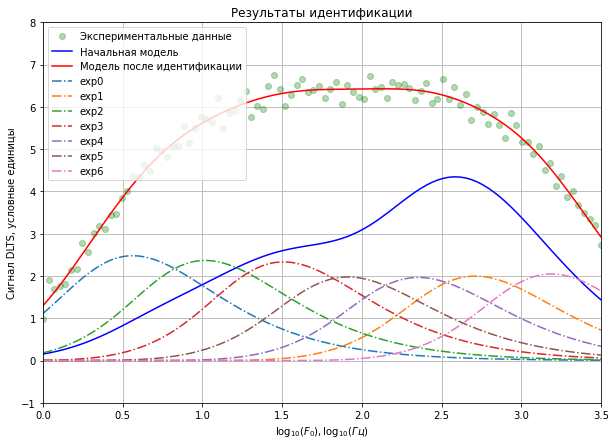

In [27]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

# Пример неудачной идентификации - избыточное количество экспоененциальных составляющих (15 вместо 5)

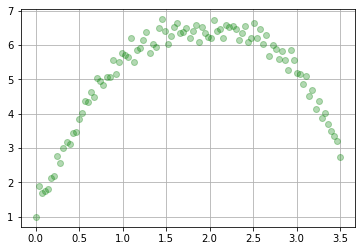

In [28]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

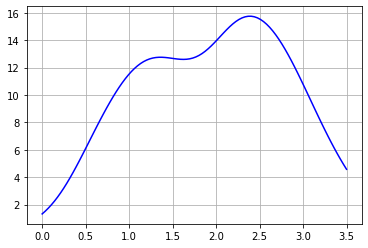

In [29]:
n_exps = 30
exps_params = [[np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps)]

fs = MultiExpFrequencyScan(n_exps=n_exps,
                           exps_params=exps_params,
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_model = fs(frequency_powers)

plt.plot(frequency_powers, initial_model, '-b')

plt.grid()
plt.show()

In [30]:
fit_results = fs.fit(frequency_powers, experimental_dlts)
fit_results

iter # 0
exps_params:
 [[-3.05881947  1.        ]
 [-3.03234922  1.        ]
 [-1.71644083  1.        ]
 [-1.22892161  1.        ]
 [-2.69073395  1.        ]
 [-1.4254145   1.        ]
 [-3.30492227  1.        ]
 [-1.78604601  1.        ]
 [-2.87430474  1.        ]
 [-2.67381895  1.        ]
 [-2.69575845  1.        ]
 [-2.16317927  1.        ]
 [-2.64497883  1.        ]
 [-1.72480287  1.        ]
 [-2.68760418  1.        ]
 [-1.63298564  1.        ]
 [-1.9232849   1.        ]
 [-1.17449202  1.        ]
 [-2.79274601  1.        ]
 [-1.55215825  1.        ]
 [-3.43653427  1.        ]
 [-1.85268629  1.        ]
 [-3.34635431  1.        ]
 [-2.80898639  1.        ]
 [-1.4538141   1.        ]
 [-1.04585542  1.        ]
 [-1.0809502   1.        ]
 [-2.83859893  1.        ]
 [-2.76571277  1.        ]
 [-1.10304735  1.        ]]
Loss: 36.14011809754682
iter # 1
exps_params:
 [[-3.37016092  0.55318215]
 [-3.33062869  0.54511381]
 [-1.56349105  0.52279417]
 [-0.93443291  0.63264229]
 [-2.798242

iter # 10
exps_params:
 [[-3.34761059  0.46577649]
 [-3.30221544  0.45966133]
 [-1.71221736  0.55971615]
 [-1.02307317  0.51064182]
 [-2.66858903  0.48063388]
 [-1.31668573  0.51265406]
 [-3.72542345  0.55369286]
 [-1.78992795  0.57222973]
 [-3.01111977  0.44459374]
 [-2.64008529  0.48605252]
 [-2.67720535  0.4790618 ]
 [-2.1045529   0.59896459]
 [-2.59337482  0.49562247]
 [-1.72198417  0.56128033]
 [-2.6632559   0.48162244]
 [-1.60859631  0.54383205]
 [-1.92066432  0.59130854]
 [-0.9402392   0.51652813]
 [-2.85426563  0.45410198]
 [-1.49914712  0.52935107]
 [-3.89613258  0.61528713]
 [-1.85685837  0.58262736]
 [-3.78176557  0.57240779]
 [-2.88529591  0.45125236]
 [-1.35827458  0.51553299]
 [-0.74566609  0.54280679]
 [-0.7981032   0.53394062]
 [-2.94228646  0.44725581]
 [-2.80324236  0.4598016 ]
 [-0.83147532  0.52899572]]
Loss: 0.06048646645900057
iter # 11
exps_params:
 [[-3.34799551  0.46593189]
 [-3.30297366  0.45976023]
 [-1.71375958  0.55999848]
 [-1.02486146  0.51001374]
 [-2.66

iter # 20
exps_params:
 [[-3.34944385  0.47091208]
 [-3.30774238  0.46444422]
 [-1.72184412  0.55910456]
 [-1.03296391  0.51163635]
 [-2.65870428  0.47377935]
 [-1.30953032  0.51385201]
 [-3.70065654  0.54913087]
 [-1.80403647  0.57330175]
 [-3.02585205  0.44122515]
 [-2.62782624  0.47987815]
 [-2.66806826  0.47202934]
 [-2.10804553  0.60674602]
 [-2.57767067  0.49083183]
 [-1.73227163  0.56084644]
 [-2.65291463  0.47488466]
 [-1.61053802  0.54210449]
 [-1.93635389  0.59588977]
 [-0.95516128  0.5155449 ]
 [-2.86074174  0.44664508]
 [-1.49416261  0.52800727]
 [-3.87588451  0.6036455 ]
 [-1.87288033  0.58547929]
 [-3.75690519  0.56533733]
 [-2.89404319  0.44434311]
 [-1.35042275  0.51612579]
 [-0.76552601  0.53508316]
 [-0.81778872  0.52816822]
 [-2.95444924  0.44173515]
 [-2.80550387  0.45182426]
 [-0.85058612  0.52444546]]
Loss: 0.054072965071722816
iter # 21
exps_params:
 [[-3.34944784  0.47143983]
 [-3.30807934  0.46495652]
 [-1.72257409  0.55887431]
 [-1.03347581  0.51204935]
 [-2.6

iter # 30
exps_params:
 [[-3.34891798  0.47545042]
 [-3.31022724  0.46889568]
 [-1.72877483  0.55668328]
 [-1.03704511  0.51583464]
 [-2.65154148  0.46893878]
 [-1.29889611  0.51581938]
 [-3.67853347  0.54502928]
 [-1.81582299  0.57229917]
 [-3.03784521  0.43998821]
 [-2.61873501  0.47558191]
 [-2.66151918  0.46704831]
 [-2.11302974  0.61174125]
 [-2.56587253  0.48765035]
 [-1.7399168   0.5585653 ]
 [-2.64537842  0.47013685]
 [-1.60920027  0.53909518]
 [-1.95036583  0.59797972]
 [-0.96387105  0.51879303]
 [-2.86699617  0.44169648]
 [-1.48562742  0.52616783]
 [-3.8574049   0.59291755]
 [-1.8868474   0.58604901]
 [-3.73450998  0.55897166]
 [-2.90204865  0.43994447]
 [-1.33913667  0.51722611]
 [-0.78056884  0.53384751]
 [-0.83196537  0.52836573]
 [-2.96492095  0.43863654]
 [-2.80838148  0.44628983]
 [-0.86385811  0.52548921]]
Loss: 0.04985775939773996
iter # 31
exps_params:
 [[-3.34882414  0.47583257]
 [-3.3103993   0.46927446]
 [-1.72942668  0.5564438 ]
 [-1.03737545  0.5162375 ]
 [-2.65

iter # 40
exps_params:
 [[-3.34788449  0.47888722]
 [-3.31161401  0.4723169 ]
 [-1.73496922  0.55441728]
 [-1.04007214  0.51958733]
 [-2.64532011  0.46484135]
 [-1.28962936  0.51766587]
 [-3.65965472  0.5414684 ]
 [-1.82633961  0.57137637]
 [-3.04778786  0.43911228]
 [-2.61082656  0.47198926]
 [-2.65583837  0.46282038]
 [-2.11717103  0.61587393]
 [-2.55564815  0.48508057]
 [-1.74676467  0.55643331]
 [-2.63882886  0.46612557]
 [-1.60770735  0.53629622]
 [-1.96236287  0.59979915]
 [-0.97066912  0.52186242]
 [-2.87252572  0.43753945]
 [-1.47764978  0.52456341]
 [-3.84102378  0.58342012]
 [-1.89907484  0.58655613]
 [-3.71513816  0.55346116]
 [-2.90903308  0.43629813]
 [-1.32918114  0.51832704]
 [-0.79289664  0.5334358 ]
 [-0.84344668  0.52910237]
 [-2.97385207  0.43616055]
 [-2.81101695  0.44157312]
 [-0.87452296  0.52688895]]
Loss: 0.04675699012026307
iter # 41
exps_params:
 [[-3.34777623  0.47919058]
 [-3.3117209   0.47262019]
 [-1.73554973  0.55420771]
 [-1.04034891  0.51992823]
 [-2.64

iter # 50
exps_params:
 [[-3.34682264  0.48166166]
 [-3.31251579  0.47509623]
 [-1.74047178  0.55246001]
 [-1.04269085  0.52273338]
 [-2.63996754  0.46124831]
 [-1.2819156   0.51936373]
 [-3.64364928  0.53865122]
 [-1.83558761  0.57066497]
 [-3.05622298  0.43848979]
 [-2.60397632  0.46885656]
 [-2.65096775  0.45910861]
 [-2.12037991  0.61933994]
 [-2.54677375  0.48287676]
 [-1.75285019  0.55460206]
 [-2.63318407  0.46261103]
 [-1.60623569  0.53385133]
 [-1.97243661  0.60146631]
 [-0.97634817  0.52446288]
 [-2.87753371  0.43397733]
 [-1.47049728  0.52326842]
 [-3.82648133  0.57534358]
 [-1.9095947   0.58711529]
 [-3.69847308  0.54898368]
 [-2.9152566   0.43321568]
 [-1.32076099  0.51941186]
 [-0.80320861  0.53322033]
 [-0.85301698  0.52983033]
 [-2.98162374  0.43414299]
 [-2.81353339  0.43746645]
 [-0.88339874  0.52815474]]
Loss: 0.044476951690855644
iter # 51
exps_params:
 [[-3.34672078  0.48191026]
 [-3.312589    0.47534578]
 [-1.74098623  0.5522805 ]
 [-1.04293622  0.52301771]
 [-2.6

iter # 60
exps_params:
 [[-3.34585552  0.48394747]
 [-3.3131493   0.47739298]
 [-1.74534294  0.55078422]
 [-1.0450276   0.52536017]
 [-2.63537622  0.45808401]
 [-1.27552926  0.52090698]
 [-3.63013543  0.53647316]
 [-1.84369345  0.57013163]
 [-3.06339571  0.43804918]
 [-2.59805312  0.46610782]
 [-2.64680618  0.4558375 ]
 [-2.12285588  0.62226591]
 [-2.53907109  0.4809651 ]
 [-1.75823913  0.55304334]
 [-2.62833237  0.45951748]
 [-1.60481476  0.53173428]
 [-1.98089697  0.60298466]
 [-0.98118104  0.52664014]
 [-2.88204744  0.43092085]
 [-1.4641363   0.52223928]
 [-3.81362741  0.56855787]
 [-1.91862868  0.58770144]
 [-3.68420894  0.54540382]
 [-2.92078225  0.43060416]
 [-1.31367967  0.52045392]
 [-0.81188165  0.53308536]
 [-0.86106219  0.5304773 ]
 [-2.98837786  0.43249127]
 [-2.81591197  0.43388812]
 [-0.89086357  0.52924366]]
Loss: 0.04280164494501218
iter # 61
exps_params:
 [[-3.34576552  0.48415332]
 [-3.31320231  0.47760002]
 [-1.74579787  0.55063041]
 [-1.04524775  0.52559816]
 [-2.63

iter # 70
exps_params:
 [[-3.345013    0.48584411]
 [-3.31361637  0.47930158]
 [-1.74964842  0.54934631]
 [-1.04712895  0.52756454]
 [-2.63144632  0.45529851]
 [-1.2702341   0.52230125]
 [-3.61874781  0.53479515]
 [-1.85079776  0.56973384]
 [-3.06948579  0.43773668]
 [-2.59293843  0.46369443]
 [-2.64325907  0.45295682]
 [-2.12477846  0.62475061]
 [-2.53238571  0.47930136]
 [-1.76300464  0.55171327]
 [-2.62417061  0.45679519]
 [-1.60345195  0.52990167]
 [-1.98803324  0.60435547]
 [-0.98532916  0.5284681 ]
 [-2.88608289  0.42830096]
 [-1.45849022  0.52142676]
 [-3.802313    0.56287663]
 [-1.92640158  0.58828664]
 [-3.6720391   0.54254837]
 [-2.92565557  0.4283913 ]
 [-1.30771952  0.52143778]
 [-0.81919253  0.53299724]
 [-0.86785366  0.53104071]
 [-2.99422149  0.43113399]
 [-2.81812891  0.43077661]
 [-0.89717552  0.53017325]]
Loss: 0.04156978236573423
iter # 71
exps_params:
 [[-3.34493573  0.48601526]
 [-3.31365634  0.47947389]
 [-1.75005034  0.54921408]
 [-1.04732743  0.52776495]
 [-2.63

iter # 80
exps_params:
 [[-3.34429527  0.48742249]
 [-3.31397362  0.48089105]
 [-1.75345167  0.54810844]
 [-1.04902704  0.52942556]
 [-2.6280915   0.45284712]
 [-1.26583368  0.5235576 ]
 [-3.60915703  0.53349802]
 [-1.85703092  0.56943838]
 [-3.07464727  0.43751351]
 [-2.58852847  0.46157377]
 [-2.64024502  0.4504213 ]
 [-2.1262794   0.62687275]
 [-2.5265826   0.47784857]
 [-1.76721723  0.55057411]
 [-2.62060928  0.4543998 ]
 [-1.60215     0.52831433]
 [-1.99408296  0.60558637]
 [-0.98891258  0.53001   ]
 [-2.88966694  0.42605759]
 [-1.45348078  0.52079008]
 [-3.79238264  0.55812084]
 [-1.93310915  0.58885329]
 [-3.66167316  0.54026475]
 [-2.92992915  0.42651594]
 [-1.30269374  0.52235708]
 [-0.82536272  0.53293962]
 [-0.87360396  0.53152825]
 [-2.99925676  0.43001433]
 [-2.82017397  0.42807645]
 [-0.90253415  0.53096619]]
Loss: 0.0406623921991814
iter # 81
exps_params:
 [[-3.34423002  0.48756504]
 [-3.31400475  0.48103464]
 [-1.75380669  0.54799442]
 [-1.04920674  0.52959529]
 [-2.627

iter # 90
exps_params:
 [[-3.34369231  0.48873751]
 [-3.3142554   0.48221565]
 [-1.75681175  0.54703984]
 [-1.05074885  0.53100546]
 [-2.62523686  0.4506884 ]
 [-1.26217003  0.52468905]
 [-3.60107723  0.53248885]
 [-1.86250907  0.56922094]
 [-3.07901446  0.43735219]
 [-2.58473221  0.45970699]
 [-2.63769394  0.44818887]
 [-2.12745314  0.62869559]
 [-2.52154334  0.47657432]
 [-1.77094238  0.54959544]
 [-2.61757054  0.45229033]
 [-1.60091005  0.526939  ]
 [-1.99923707  0.60668909]
 [-0.99202601  0.53131637]
 [-2.89283459  0.42413794]
 [-1.44903534  0.52029667]
 [-3.78368194  0.55413405]
 [-1.93891662  0.58939209]
 [-3.6528488   0.53842972]
 [-2.93366034  0.42492603]
 [-1.29844829  0.52321092]
 [-0.83057277  0.53290241]
 [-0.87848388  0.53194868]
 [-3.00358092  0.42908701]
 [-2.82204779  0.42573681]
 [-0.90709859  0.53164279]]
Loss: 0.039992381756398625
iter # 91
exps_params:
 [[-3.34363784  0.48885629]
 [-3.31428035  0.4823353 ]
 [-1.75712551  0.54694128]
 [-1.05091226  0.53114997]
 [-2.6

iter # 100
exps_params:
 [[-3.34319117  0.48983308]
 [-3.31448378  0.48331912]
 [-1.75978253  0.54611543]
 [-1.05231765  0.5323534 ]
 [-2.62281716  0.44878467]
 [-1.25911623  0.52570884]
 [-3.5942658   0.53169752]
 [-1.86733408  0.56906388]
 [-3.08270358  0.43723339]
 [-2.58146967  0.45805933]
 [-2.63554499  0.44622107]
 [-2.12836826  0.63027024]
 [-2.51716426  0.47545054]
 [-1.77423961  0.54875273]
 [-2.61498637  0.45042957]
 [-1.5997321   0.52574739]
 [-2.00364893  0.60767698]
 [-0.9947455   0.53242752]
 [-2.89562446  0.42249601]
 [-1.44508812  0.5199205 ]
 [-3.77606435  0.55078451]
 [-1.94396243  0.58989914]
 [-3.64533613  0.53694681]
 [-2.93690698  0.42357742]
 [-1.2948567   0.52400147]
 [-0.83497089  0.53287899]
 [-0.88263201  0.53231038]
 [-3.00728391  0.42831595]
 [-2.82375765  0.42371172]
 [-0.91099719  0.53222038]]
Loss: 0.039496232730403175
iter # 101
exps_params:
 [[-3.34314615  0.489932  ]
 [-3.31450429  0.48341874]
 [-1.76006011  0.54603009]
 [-1.05246691  0.53247702]
 [-2

iter # 110
exps_params:
 [[-3.34277884  0.49074488]
 [-3.31467355  0.48423719]
 [-1.76241243  0.54531453]
 [-1.05375352  0.5335086 ]
 [-2.62077534  0.44710228]
 [-1.25656978  0.52662959]
 [-3.58851937  0.53107176]
 [-1.87159459  0.56895424]
 [-3.08581437  0.43714358]
 [-2.5786707   0.45660017]
 [-2.63374518  0.44448348]
 [-2.12907555  0.63163823]
 [-2.51335506  0.47445331]
 [-1.7771623   0.54802591]
 [-2.61279725  0.44878439]
 [-1.59861512  0.5247153 ]
 [-2.00744235  0.60856343]
 [-0.99713282  0.53337587]
 [-2.89807553  0.42109204]
 [-1.44158002  0.51964059]
 [-3.76939499  0.54796311]
 [-1.94836233  0.59037377]
 [-3.63893739  0.53574142]
 [-2.93972446  0.4224329 ]
 [-1.2918149   0.52473257]
 [-0.83867944  0.53286501]
 [-0.88616169  0.53262101]
 [-3.01044686  0.42767242]
 [-2.82531443  0.42196023]
 [-0.9143344   0.53271365]]
Loss: 0.039127669068360536
iter # 111
exps_params:
 [[-3.34274203  0.49082712]
 [-3.31469083  0.48431998]
 [-1.76265837  0.54524055]
 [-1.05389048  0.53361479]
 [-2

iter # 120
exps_params:
 [[-3.34244342  0.49150217]
 [-3.31483496  0.48499928]
 [-1.76474448  0.54461988]
 [-1.05507383  0.53450264]
 [-2.6190616   0.44561161]
 [-1.25444738  0.52746295]
 [-3.58366846  0.53057271]
 [-1.8753673   0.56888231]
 [-3.0884319   0.43707331]
 [-2.57627396  0.45530295]
 [-2.6322483   0.44294569]
 [-2.12961352  0.63283341]
 [-2.5100374   0.4735625 ]
 [-1.77975784  0.54739833]
 [-2.61095115  0.44732571]
 [-1.59755716  0.52382184]
 [-2.01071787  0.60936104]
 [-0.99923862  0.53418767]
 [-2.90022524  0.41989188]
 [-1.43845826  0.51943998]
 [-3.7635523   0.54558025]
 [-1.95221321  0.59081708]
 [-3.63348423  0.53475607]
 [-2.94216415  0.4214612 ]
 [-1.28923693  0.52540881]
 [-0.84180007  0.53285761]
 [-0.88916631  0.53288738]
 [-3.01314176  0.42713346]
 [-2.82673068  0.4204462 ]
 [-0.91719597  0.533135  ]]
Loss: 0.0388529531797043
iter # 121
exps_params:
 [[-3.34241369  0.49157037]
 [-3.31484984  0.48506788]
 [-1.76496281  0.54455567]
 [-1.0552001   0.53459422]
 [-2.6

iter # 130
exps_params:
 [[-3.34217438  0.49212912]
 [-3.31497531  0.48562969]
 [-1.76681665  0.54401686]
 [-1.05629366  0.53536122]
 [-2.6176325   0.44428684]
 [-1.25268093  0.52821948]
 [-3.57957214  0.53017144]
 [-1.87871841  0.56884072]
 [-3.09062849  0.43701603]
 [-2.57422596  0.45414479]
 [-2.63101413  0.44158109]
 [-2.13001198  0.63388352]
 [-2.50714359  0.47276129]
 [-1.78206795  0.54685605]
 [-2.6094027   0.44602821]
 [-1.59655552  0.52304895]
 [-2.01355766  0.61008126]
 [-1.00110485  0.53488441]
 [-2.90210843  0.41886631]
 [-1.43567588  0.51930492]
 [-3.75842833  0.54356248]
 [-1.9555963   0.5912311 ]
 [-3.62883421  0.53394638]
 [-2.94427266  0.42063605]
 [-1.2870515   0.52603508]
 [-0.84441777  0.53285494]
 [-0.89172337  0.53311551]
 [-3.01543178  0.42668072]
 [-2.82801936  0.41913801]
 [-0.91965283  0.53349493]]
Loss: 0.0386474451064263
iter # 131
exps_params:
 [[-3.34215077  0.49218545]
 [-3.31498841  0.4856863 ]
 [-1.76701089  0.5439611 ]
 [-1.05641064  0.53544047]
 [-2.6

iter # 140
exps_params:
 [[-3.34196262  0.49264579]
 [-3.3150999   0.48614865]
 [-1.76866221  0.54349303]
 [-1.05742612  0.5361054 ]
 [-2.61645023  0.44310562]
 [-1.25121443  0.52890864]
 [-3.57611321  0.52984633]
 [-1.88170493  0.56882374]
 [-3.09246549  0.43696721]
 [-2.5724802   0.45310611]
 [-2.63000764  0.44036657]
 [-2.13029449  0.63481135]
 [-2.50461527  0.47203567]
 [-1.78412923  0.54638725]
 [-2.60811237  0.44487   ]
 [-1.59560692  0.52238093]
 [-2.01602936  0.61073422]
 [-1.00276651  0.53548376]
 [-2.90375687  0.41799039]
 [-1.4331913   0.51922418]
 [-3.75392807  0.54184962]
 [-1.95857986  0.59161826]
 [-3.6248671   0.53327795]
 [-2.94609169  0.41993541]
 [-1.28519921  0.52661627]
 [-0.84660395  0.53285576]
 [-0.89389769  0.53331064]
 [-3.01737192  0.42629938]
 [-2.82919314  0.4180081 ]
 [-0.92176414  0.53380233]]
Loss: 0.03849310613055148
iter # 141
exps_params:
 [[-3.34194429  0.49269206]
 [-3.31511166  0.48619509]
 [-1.76883545  0.54344458]
 [-1.05753502  0.53617422]
 [-2.

iter # 150
exps_params:
 [[-3.34180034  0.4930689 ]
 [-3.31521266  0.48657301]
 [-1.77031024  0.54303774]
 [-1.05848264  0.53675258]
 [-2.61548189  0.44204861]
 [-1.25000157  0.5295388 ]
 [-3.57319402  0.52958105]
 [-1.88437596  0.56882685]
 [-3.09399496  0.43692373]
 [-2.57099632  0.45217018]
 [-2.62919842  0.43928211]
 [-2.13047995  0.63563574]
 [-2.50240222  0.47137397]
 [-1.78597362  0.54598185]
 [-2.60704582  0.44383221]
 [-1.59470774  0.52180417]
 [-2.01818891  0.61132881]
 [-1.00425303  0.53600041]
 [-2.90519915  0.41724285]
 [-1.43096773  0.5191886 ]
 [-3.74996847  0.54039225]
 [-1.96122143  0.59198105]
 [-3.62148151  0.53272395]
 [-2.94765822  0.41934076]
 [-1.28363043  0.52715704]
 [-0.84841899  0.53285928]
 [-0.89574374  0.53347731]
 [-3.01900988  0.42597751]
 [-2.83026401  0.41703256]
 [-0.92357949  0.53406472]]
Loss: 0.03837669445868218
iter # 151
exps_params:
 [[-3.34178657  0.49310663]
 [-3.3152234   0.48661081]
 [-1.77046518  0.54299561]
 [-1.05858451  0.53681255]
 [-2.

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2,time_constatn_power_3,amplitude_3,...,time_constatn_power_25,amplitude_25,time_constatn_power_26,amplitude_26,time_constatn_power_27,amplitude_27,time_constatn_power_28,amplitude_28,time_constatn_power_29,amplitude_29
0,36.140118,30,-3.058819,1.000000,-3.032349,1.000000,-1.716441,1.000000,-1.228922,1.000000,...,-1.045855,1.000000,-1.080950,1.000000,-2.838599,1.000000,-2.765713,1.000000,-1.103047,1.000000
1,1.029707,30,-3.370161,0.553182,-3.330629,0.545114,-1.563491,0.522794,-0.934433,0.632642,...,-0.723314,0.689536,-0.761652,0.678270,-3.029561,0.497493,-2.914752,0.485111,-0.786339,0.671241
2,0.448624,30,-3.357003,0.522036,-3.314294,0.515029,-1.620571,0.531211,-0.962497,0.584982,...,-0.724913,0.636977,-0.768248,0.625940,-2.991846,0.483534,-2.871781,0.480633,-0.796144,0.619212
3,0.218722,30,-3.350139,0.501277,-3.305496,0.494916,-1.655343,0.541299,-0.981793,0.557167,...,-0.727601,0.604716,-0.774178,0.593975,-2.968534,0.473992,-2.844241,0.477457,-0.804135,0.587558
4,0.127355,30,-3.347194,0.487141,-3.301478,0.481092,-1.676609,0.548222,-0.994706,0.539655,...,-0.730232,0.583633,-0.778918,0.573179,-2.954951,0.466252,-2.827234,0.473729,-0.810196,0.567036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.038408,30,-3.341844,0.492951,-3.315180,0.486455,-1.769835,0.543168,-1.058173,0.536568,...,-0.847910,0.532858,-0.895222,0.533430,-3.018548,0.426068,-2.829953,0.417310,-0.923063,0.533990
148,0.038397,30,-3.341829,0.492991,-3.315191,0.486495,-1.769995,0.543124,-1.058277,0.536630,...,-0.848083,0.532858,-0.895398,0.533446,-3.018704,0.426038,-2.830058,0.417216,-0.923238,0.534016
149,0.038387,30,-3.341815,0.493030,-3.315202,0.486534,-1.770154,0.543080,-1.058380,0.536692,...,-0.848253,0.532859,-0.895573,0.533462,-3.018858,0.426007,-2.830161,0.417124,-0.923410,0.534040
150,0.038377,30,-3.341800,0.493069,-3.315213,0.486573,-1.770310,0.543038,-1.058483,0.536753,...,-0.848419,0.532859,-0.895744,0.533477,-3.019010,0.425978,-2.830264,0.417033,-0.923579,0.534065


In [31]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 0.49314357293707256
Time constant power 0 : -3.341773220477202
Amplitude 1 : 0.48664781246109956
Time constant power 1 : -3.3152340626506436
Amplitude 2 : 0.5429540720605428
Time constant power 2 : -1.770618428540158
Amplitude 3 : 0.5368716992002277
Time constant power 3 : -1.0586857342900138
Amplitude 4 : 0.44185060564900003
Time constant power 4 : -2.615311308052402
Amplitude 5 : 0.5296584220650646
Time constant power 5 : -1.2497859281360442
Amplitude 6 : 0.5295340327140888
Time constant power 6 : -3.5726675201366516
Amplitude 7 : 0.5688295525580618
Time constant power 7 : -1.8848761285443743
Amplitude 8 : 0.43691547920995166
Time constant power 8 : -3.094267963247373
Amplitude 9 : 0.45199403687341105
Time constant power 9 : -2.570727801101249
Amplitude 10 : 0.43907926403570896
Time constant power 10 : -2.629057857872759
Amplitude 11 : 0.6357896268515776
Time constant power 11 : -2.130506813093939
Amplitude 12 : 0.4712484183999143
Time constant power 12 : -2.50199353234

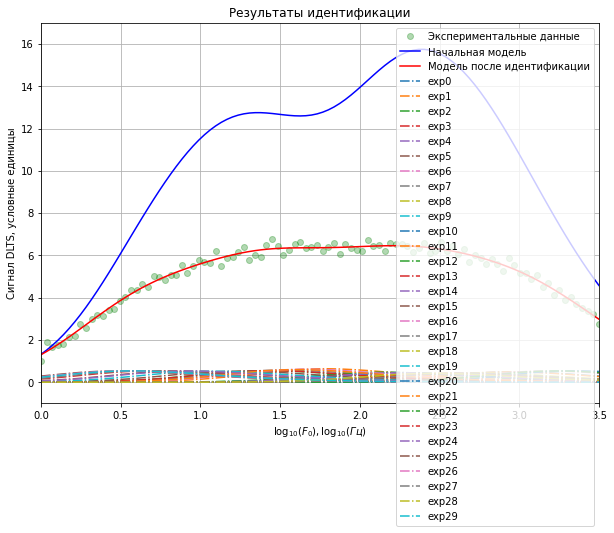

In [32]:
final_model = fs(frequency_powers)

fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()